### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [130]:
nombre = ['Juan Maniglia','Abdon','Andres','Jose','Carlos','Ronald',
                  'Nuria','Denisia','Isabel','Javier','Vinicius','Lamine','Pedri','Gavi']

edad =[23,22,32,43,44,24,33,46,19,17,23,27,34,16]

altura = [1.80,1.75,1.85,1.90,1.82,1.80,1.78,1.85,1.80,1.75,1.85,1.90,1.82,1.80]

datos = {
    'nombre': nombre,
    'edad': edad,
    'altura': altura
}

In [131]:
import pandas as pd

In [132]:
df = pd.DataFrame(datos)
df

,nombre,edad,altura
0,Juan Maniglia,23,1.80
1,Abdon,22,1.75
2,Andres,32,1.85
3,Jose,43,1.90
4,Carlos,44,1.82
5,Ronald,24,1.80
6,Nuria,33,1.78
7,Denisia,46,1.85
8,Isabel,19,1.80
9,Javier,17,1.75


In [133]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  14 non-null     object 
 1   edad    14 non-null     int64  
 2   altura  14 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 468.0+ bytes


In [134]:
df.describe()

,edad,altura
count,14.000000,14.000000
mean,28.785714,1.819286
std,10.085622,0.046816
min,16.000000,1.750000
25%,22.250000,1.800000
50%,25.500000,1.810000
75%,33.750000,1.850000
max,46.000000,1.900000


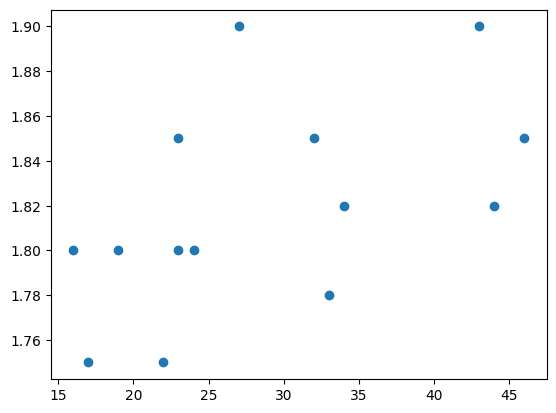

In [135]:
import matplotlib.pyplot as plt

plt.scatter(df['edad'],df['altura'])

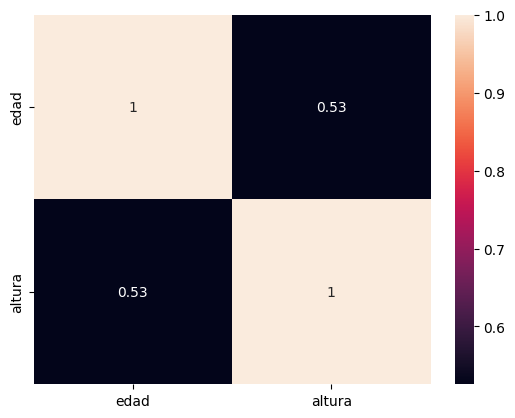

In [136]:
import seaborn as sns
sns.heatmap(df.select_dtypes('number').corr(), annot=True);

C:\Users\Abdon.RAMIREZ-BRICEN\AppData\Local\Temp\ipykernel_12832\1732590516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['altura']);


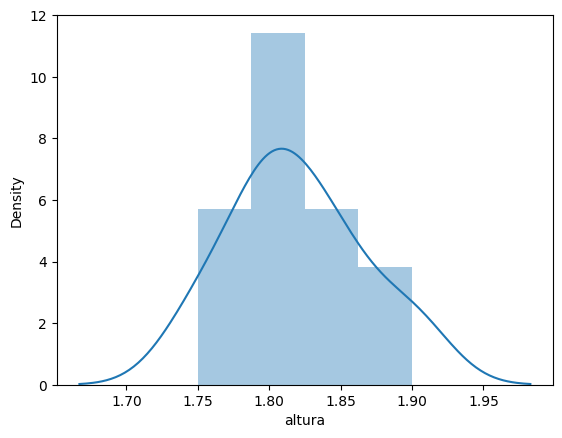

In [137]:
sns.distplot(df['altura']);

In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['nombre'] = le.fit_transform(df['nombre'])


In [139]:
X = df.drop(columns='altura')
y = df['altura']

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=42)

In [141]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (14, 2)
Train features shape: (7, 2)
Train target shape: (7,)
Test features shape: (7, 2)
Test target shape: (7,)


In [142]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [143]:
print(model.intercept_, model.coef_)

1.7149160497248257 [0.00473921 0.0024703 ]


(Altura) = 1.85 - 0.0041*(Edad)

In [144]:
# Prediccion
pred = model.predict(X_test)

In [145]:
dict = {'Prediccion':pred,'Real':y_test}

df_test = pd.DataFrame(dict)
df_test

,Prediccion,Real
9,1.785346,1.75
11,1.824267,1.90
0,1.809647,1.80
12,1.851038,1.82
5,1.831074,1.80
8,1.785548,1.80
2,1.798705,1.85


In [146]:
df_test2 = pd.DataFrame(X_test)
df_test2['Prediccion'] = model.predict(X_test)
df_test2

,nombre,edad,Prediccion
9,6,17,1.785346
11,9,27,1.824267
0,8,23,1.809647
12,11,34,1.851038
5,12,24,1.831074
8,5,19,1.785548
2,1,32,1.798705


In [147]:
df_test['Real'] = y_test
df_test

,Prediccion,Real
9,1.785346,1.75
11,1.824267,1.90
0,1.809647,1.80
12,1.851038,1.82
5,1.831074,1.80
8,1.785548,1.80
2,1.798705,1.85


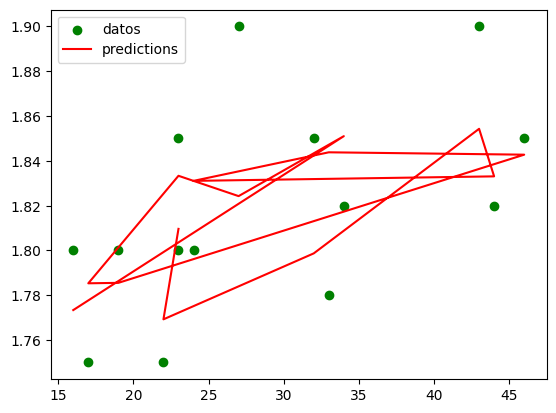

In [148]:
plt.scatter(df['edad'], df['altura'], color='g', label="datos");
plt.plot(df['edad'], model.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [149]:
model.score(X,y)

0.31253119770105187

In [150]:
df_test

,Prediccion,Real
9,1.785346,1.75
11,1.824267,1.90
0,1.809647,1.80
12,1.851038,1.82
5,1.831074,1.80
8,1.785548,1.80
2,1.798705,1.85


In [151]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [152]:
print('MAE:', mean_absolute_error(y_train,pred))
print('RMSE:', root_mean_squared_error(y_train,pred))

MAE: 0.031869675705874324
RMSE: 0.04744004155429964


In [153]:
print('MAPE:', mean_absolute_percentage_error(y_train,pred))

MAPE: 0.017272274799530217


In [154]:
df_test

,Prediccion,Real
9,1.785346,1.75
11,1.824267,1.90
0,1.809647,1.80
12,1.851038,1.82
5,1.831074,1.80
8,1.785548,1.80
2,1.798705,1.85


In [155]:
df_test['error'] = df_test['Real'] - df_test['Prediccion']
df_test

,Prediccion,Real,error
9,1.785346,1.75,-0.035346
11,1.824267,1.90,0.075733
0,1.809647,1.80,-0.009647
12,1.851038,1.82,-0.031038
5,1.831074,1.80,-0.031074
8,1.785548,1.80,0.014452
2,1.798705,1.85,0.051295


In [156]:
df_test['error'].mean()

np.float64(0.004910801773853978)

In [160]:
df_test['error_cuadratico'] = df_test['error']**2
df_test

,Prediccion,Real,error,error_cuadratico
9,1.785346,1.75,-0.035346,0.001249
11,1.824267,1.90,0.075733,0.005735
0,1.809647,1.80,-0.009647,0.000093
12,1.851038,1.82,-0.031038,0.000963
5,1.831074,1.80,-0.031074,0.000966
8,1.785548,1.80,0.014452,0.000209
2,1.798705,1.85,0.051295,0.002631


In [161]:
df_test['error_cuadratico'].mean()

np.float64(0.001692410210239435)

In [162]:
np.sqrt(df_test['error_cuadratico'].mean())

np.float64(0.04113891357631403)

In [165]:
df_test['error'].mean()/df_test['Real'].mean()

np.float64(0.002702485252907063)